# PIBIC Images

Gerando imagens que serão usadas no artigo.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pywt import wavedec
from zipfile import ZipFile
from matplotlib import pyplot as plt

sns.set(style='darkgrid', rc={'figure.figsize':(8, 6)})

## Figura 2 EEG do sinal 0 do paciente 1

1. versão sem crise
2. versão com crise

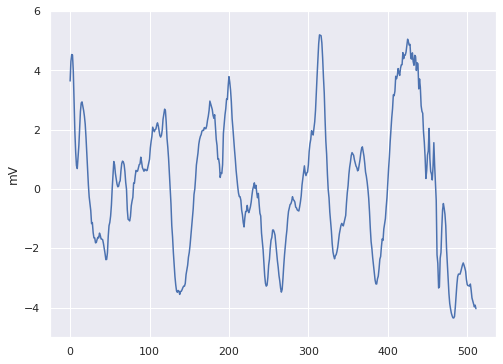

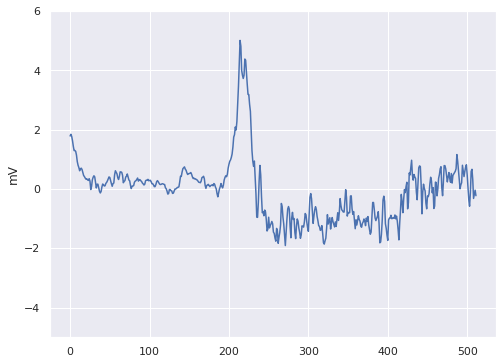

In [2]:
with ZipFile(f'chb01/chb01.zip', mode='r') as file:
    positive = next(file_name for file_name in file.namelist() if 'positive' in file_name)
    negative = next(file_name for file_name in file.namelist() if 'negative' in file_name)

    with file.open(positive) as pos, file.open(negative) as neg:
        pos_df = pd.Series(data=np.load(pos)[0])
        neg_df = pd.Series(data=np.load(neg)[0])
        
        sns.lineplot(data=pos_df).set(ylim=(-5, 6), ylabel='mV')
        plt.show()
        sns.lineplot(data=neg_df).set(ylim=(-5, 6), ylabel='mV')

## Figura 3 Coeficientes obtidos da DWT do sinal sem crise da figura 2

1. coeficiente de aproximação
2. coeficiente de detalhe

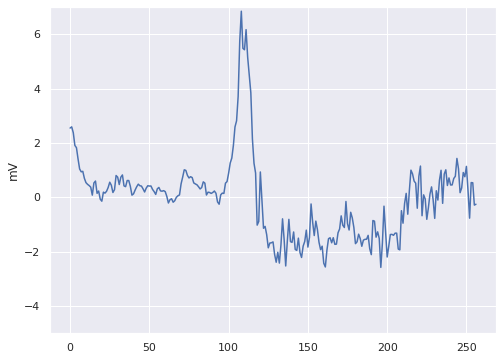

[(-5, 7), Text(0, 0.5, 'mV')]

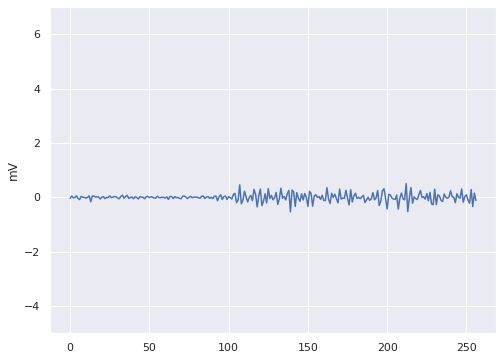

In [3]:
aprox, detail = wavedec(data=neg_df, wavelet='db2', level=1)

sns.lineplot(data=aprox).set(ylim=(-5, 7), ylabel='mV')
plt.show()
sns.lineplot(data=detail).set(ylim=(-5, 7), ylabel='mV')

## Figura 5 Boxplot de acurácias do SVM de todos os canais vs alguns

In [4]:
svm_acc_df = pd.read_csv(filepath_or_buffer='csvs/svc-oneVSall.csv')
svm_acc_df.pop('chb')
svm_acc_df

,all channels,2_3_6_7_14_15 channels,2_3_6_7_14_15_5_1 channels
0,0.856481,0.803241,0.805556
1,0.803571,0.916667,0.934524
2,0.933673,0.941327,0.951531
3,0.827957,0.844086,0.833333
4,0.932727,0.943636,0.923636
5,0.455882,0.485294,0.477941
6,0.959375,0.943750,0.956250
7,0.721978,0.643956,0.664835
8,0.566667,0.585185,0.577778
9,0.889908,0.924312,0.938073


,all channels,2_3_6_7_14_15 channels,2_3_6_7_14_15_5_1 channels
count,24.000000,24.000000,24.000000
mean,0.768078,0.777109,0.775615
std,0.182518,0.187696,0.186187
min,0.294118,0.338235,0.338235
25%,0.699337,0.635015,0.649789
50%,0.829011,0.844578,0.843750
75%,0.906344,0.918578,0.926358
max,0.964646,0.968599,0.974747


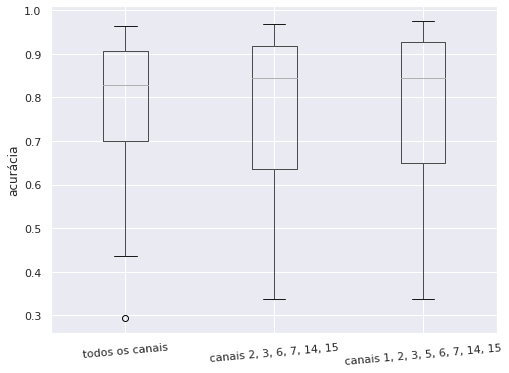

In [5]:
svm_acc_df\
    .boxplot(rot=5)\
        .set(
            xticklabels=['todos os canais', 'canais 2, 3, 6, 7, 14, 15', 'canais 1, 2, 3, 5, 6, 7, 14, 15'],
            ylabel='acurácia'
        )

svm_acc_df.describe()

## Figura ```boxplot_knn_canais```

In [6]:
acc_canais_df = pd.read_csv('./csvs/02-ranks.csv', index_col=0).transpose()
acc_canais_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
01,0.889615,0.919615,0.911154,0.936154,0.886538,0.934231,0.898462,0.913462,0.902308,0.950769,0.945769,0.922692,0.878462,0.930385,0.925000,0.922308,0.912308,0.913077
02,0.805882,0.887255,0.942157,0.933333,0.819608,0.750980,0.883333,0.914706,0.784314,0.812745,0.778431,0.739216,0.682353,0.863725,0.967647,0.894118,0.722549,0.817647
03,0.876271,0.910593,0.957203,0.966525,0.929661,0.949153,0.936864,0.939831,0.875000,0.927119,0.879661,0.954661,0.817797,0.858475,0.904661,0.955085,0.960593,0.961441
04,0.827232,0.835268,0.946875,0.945982,0.864732,0.907143,0.879018,0.940625,0.815179,0.859821,0.948661,0.955357,0.812500,0.876339,0.895982,0.926786,0.890179,0.890179
05,0.893939,0.919697,0.906061,0.898788,0.877576,0.882121,0.904242,0.912727,0.874848,0.871515,0.934242,0.951515,0.856667,0.922727,0.956970,0.959394,0.872121,0.895152
06,0.681707,0.846341,0.718293,0.640244,0.693902,0.718293,0.715854,0.604878,0.857317,0.753659,0.758537,0.659756,0.786585,0.751220,0.648780,0.693902,0.629268,0.735366
07,0.815625,0.905729,0.891146,0.874479,0.839583,0.929167,0.933854,0.939063,0.802604,0.913021,0.971354,0.925000,0.820312,0.931250,0.967187,0.927083,0.947917,0.932292
08,0.763736,0.831502,0.843590,0.862088,0.789560,0.832234,0.863919,0.888278,0.852198,0.887363,0.866850,0.880220,0.748352,0.845055,0.898352,0.848352,0.869048,0.902198
09,0.927160,0.961111,0.976543,0.966049,0.947531,0.968519,0.971605,0.959877,0.980864,0.985185,0.948148,0.971605,0.932099,0.959877,0.984568,0.962963,0.973457,0.976543
10,0.903817,0.966412,0.979389,0.940458,0.801527,0.858015,0.896183,0.907634,0.764122,0.794275,0.883969,0.888168,0.779008,0.875573,0.911832,0.900382,0.743511,0.814504


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.812648,0.873266,0.903815,0.892164,0.811322,0.874088,0.881860,0.877158,0.787807,0.852942,0.866504,0.863644,0.773904,0.829954,0.881219,0.877084,0.842913,0.857127
std,0.090112,0.094123,0.068253,0.082584,0.097304,0.084490,0.085174,0.090777,0.097883,0.095761,0.091207,0.095968,0.102482,0.124380,0.086245,0.096996,0.106502,0.084362
min,0.611905,0.582979,0.718293,0.640244,0.589362,0.680952,0.675806,0.604878,0.573404,0.588095,0.630952,0.609524,0.576190,0.505172,0.648780,0.559524,0.629268,0.643226
25%,0.769037,0.843573,0.883347,0.856910,0.759572,0.828431,0.864756,0.844667,0.730298,0.818186,0.855583,0.820797,0.708304,0.797044,0.845386,0.846667,0.754919,0.816861
50%,0.828582,0.888466,0.908607,0.906367,0.836572,0.905606,0.898369,0.910180,0.795469,0.877667,0.884136,0.875527,0.782796,0.861100,0.900920,0.898551,0.866500,0.875512
75%,0.876881,0.932383,0.949457,0.950136,0.878182,0.935573,0.927964,0.940319,0.861186,0.914141,0.915898,0.930208,0.827880,0.910914,0.941226,0.930095,0.921210,0.911841
max,0.927160,0.966912,0.996324,0.994118,0.947531,0.986029,0.990136,0.995588,0.980864,0.985185,0.996324,0.986029,0.946324,0.966176,0.984568,0.994853,0.983333,0.976543


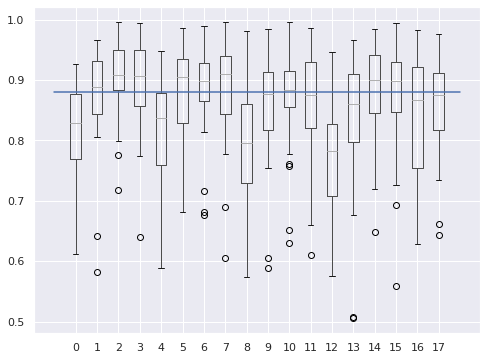

In [7]:
acc_canais_df.boxplot()
sns.lineplot(x=range(0, 20), y=0.88)
acc_canais_df.describe()